# Overview
The stock market is very unpredictable, any geopolitical change can impact the share trend of stocks in the share market, recently we have seen how covid-19 has impacted the stock prices, which is why on financial data doing a reliable trend analysis is very difficult. The most efficient way to solve this kind of issue is with the help of Machine learning and Deep learning. We use Recurrent Neural Networks for time series forecasting of all the banks under Bank Nifty.

# Streaming Data
Also known as event stream processing, streaming data is the continuous flow of data generated by various sources. By using stream processing technology, data streams can be processed, stored, analyzed, and acted upon as it's generated in real-time.

# Time Series Forecasting
Time series data is recorded at regular time intervals, and the order of these data points is important. Therefore, any predictive model based on time series data will have time as an independent variable. The output of a model would be the predicted value or classification at a specific time. We use stock price data over a period of two years as a time series to predict the future price of those shares.

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

# Data Loading
We use ticker method to retrieve the data from Yahoo Finance website. In another approach we use the existing dataset that contains stock prices for over a period of 3 months for all the banks under Bank Nifty.

In [10]:
df= yf.Ticker("^NSEBANK").history(period='2y').reset_index()
df_axis= yf.Ticker("AXISBANK.NS").history(period='2y').reset_index()
df_sbi= yf.Ticker("SBIN.NS").history(period='2y').reset_index()
df_rbl= yf.Ticker("RBLBANK.NS").history(period='2y').reset_index()
df_pnb= yf.Ticker("PNB.NS").history(period='2y').reset_index()
df_kot= yf.Ticker("KOTAKBANK.NS").history(period='2y').reset_index()
df_ind= yf.Ticker("INDUSINDBK.NS").history(period='2y').reset_index()
df_idfc= yf.Ticker("IDFCFIRSTB.NS").history(period='2y').reset_index()
df_icic= yf.Ticker("ICICIBANK.NS").history(period='2y').reset_index()
df_band= yf.Ticker("BANDHANBNK.NS").history(period='2y').reset_index()
df_hdfc= yf.Ticker("HDB").history(period='2y').reset_index()
df_fed= yf.Ticker("FEDERALBNK.NS").history(period='2y').reset_index()
df_au= yf.Ticker("AUBANK.NS").history(period='2y').reset_index()

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-11-30 00:00:00+05:30,35958.383662,36773.772641,35525.939460,35694.886719,227300,0.0,0.0
1,2021-12-01 00:00:00+05:30,35902.481922,36444.928754,35804.584620,36364.476562,173900,0.0,0.0
2,2021-12-02 00:00:00+05:30,36281.428422,36563.073574,36166.277421,36507.824219,131700,0.0,0.0
3,2021-12-03 00:00:00+05:30,36496.875408,36843.570586,36062.431253,36196.726562,138900,0.0,0.0
4,2021-12-06 00:00:00+05:30,36252.329949,36344.129666,35696.336391,35735.484375,136000,0.0,0.0


# Historical Data of NSE 

In [12]:
#import plotly.express as px
fig = px.line(df, x='Date', y="Open")
fig.show()

In [13]:
print("RBL BANK Data Date till and from")
print(df_rbl.Date.max())
print(df_rbl.Date.min())
print("AXIS BANK Data Date till and from")
print(df_axis.Date.max())
print(df_axis.Date.min())

RBL BANK Data Date till and from
2023-11-30 00:00:00+05:30
2021-11-30 00:00:00+05:30
AXIS BANK Data Date till and from
2023-11-30 00:00:00+05:30
2021-11-30 00:00:00+05:30


Text(0.5, 1.0, 'au')

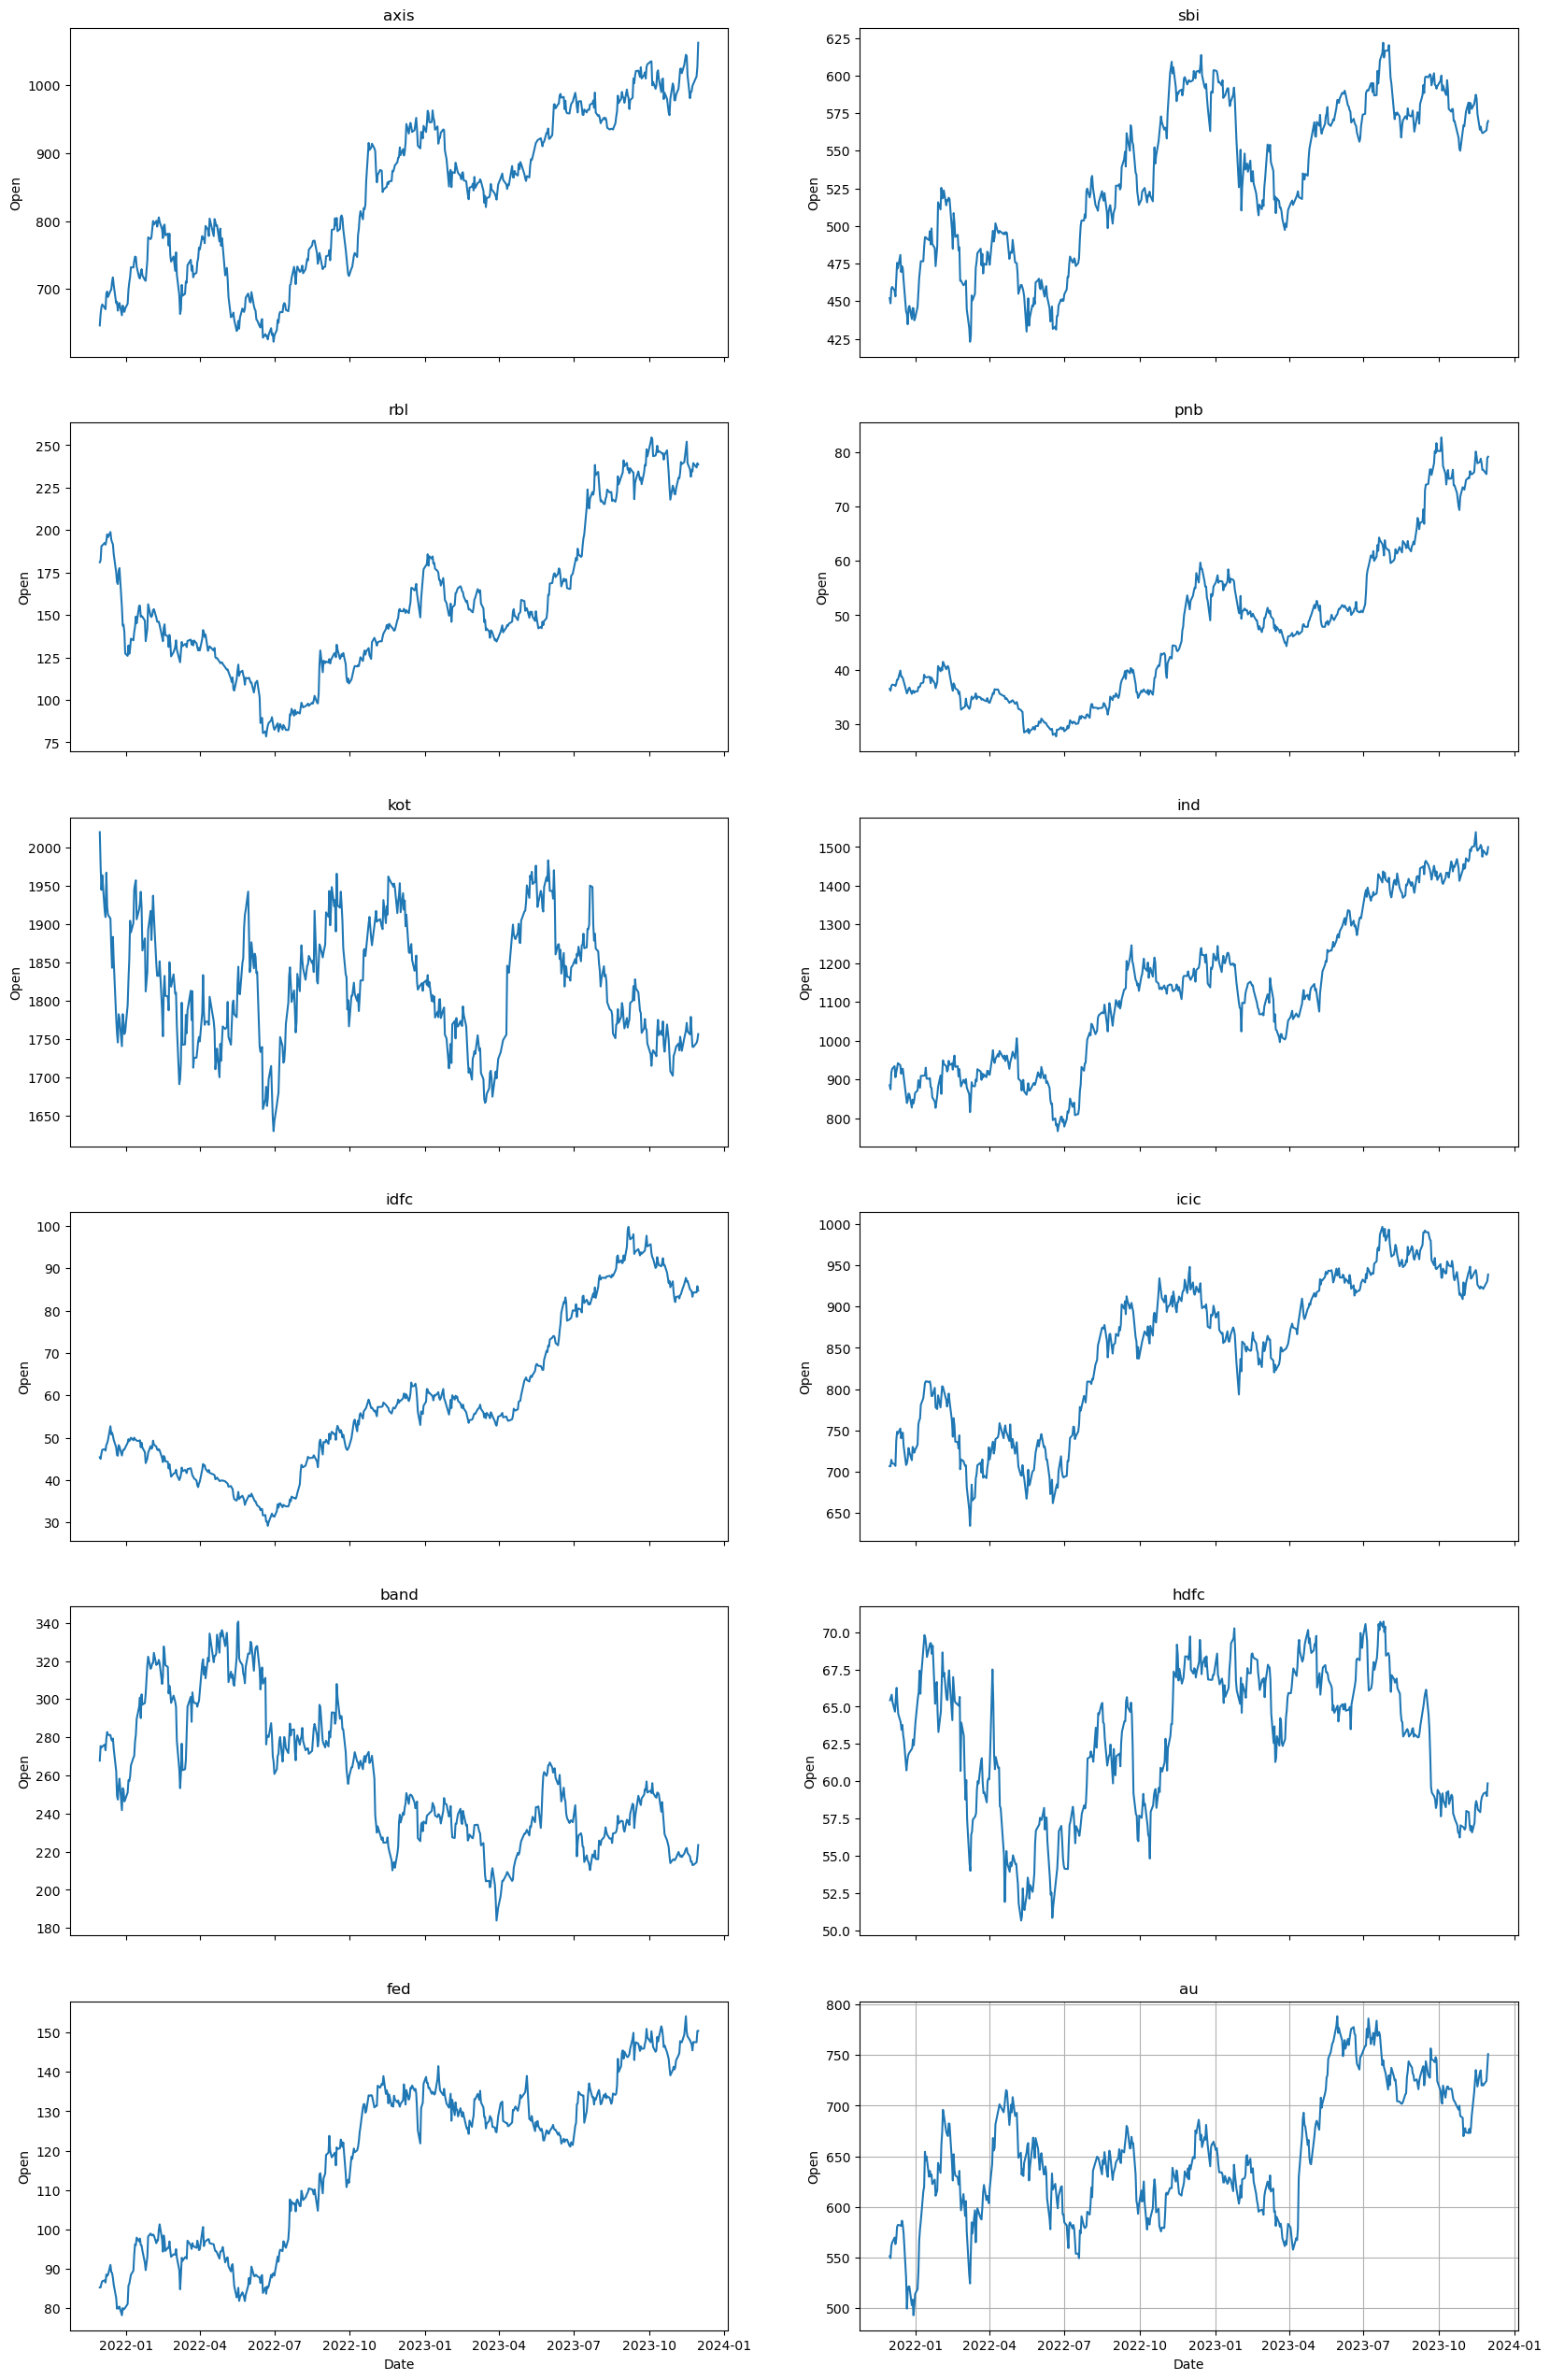

In [14]:
fig, axes = plt.subplots(6, 2, sharex=True, figsize=(20,32))
plt.grid(True)
sns.lineplot(ax=axes[0, 0], data=df_axis, x='Date', y='Open')
axes[0,0].set_title('axis')
sns.lineplot(ax=axes[0, 1], data=df_sbi, x='Date', y='Open')
axes[0,1].set_title('sbi')
sns.lineplot(ax=axes[1, 0], data=df_rbl, x='Date', y='Open')
axes[1,0].set_title('rbl')
sns.lineplot(ax=axes[1, 1], data=df_pnb, x='Date', y='Open')
axes[1,1].set_title('pnb')
sns.lineplot(ax=axes[2, 0], data=df_kot, x='Date', y='Open')
axes[2,0].set_title('kot')
sns.lineplot(ax=axes[2, 1], data=df_ind, x='Date', y='Open')
axes[2,1].set_title('ind')
sns.lineplot(ax=axes[3, 0], data=df_idfc, x='Date', y='Open')
axes[3,0].set_title('idfc')
sns.lineplot(ax=axes[3, 1], data=df_icic, x='Date', y='Open')
axes[3,1].set_title('icic')
sns.lineplot(ax=axes[4, 0], data=df_band, x='Date', y='Open')
axes[4,0].set_title('band')
sns.lineplot(ax=axes[4, 1], data=df_hdfc, x='Date', y='Open')
axes[4,1].set_title('hdfc')
sns.lineplot(ax=axes[5, 0], data=df_fed, x='Date', y='Open')
axes[5,0].set_title('fed')
sns.lineplot(ax=axes[5,1], data=df_au, x='Date', y='Open')
axes[5,1].set_title('au')

# DATA PRE-PROCESSING

In [15]:
print(df.shape)
date_train=pd.to_datetime(df['Date'])
date_train

(496, 8)


0     2021-11-30 00:00:00+05:30
1     2021-12-01 00:00:00+05:30
2     2021-12-02 00:00:00+05:30
3     2021-12-03 00:00:00+05:30
4     2021-12-06 00:00:00+05:30
                 ...           
491   2023-11-23 00:00:00+05:30
492   2023-11-24 00:00:00+05:30
493   2023-11-28 00:00:00+05:30
494   2023-11-29 00:00:00+05:30
495   2023-11-30 00:00:00+05:30
Name: Date, Length: 496, dtype: datetime64[ns, Asia/Kolkata]

# STANDARD SCALER
StandardScaler is a preprocessing class in the scikit-learn library, which is a popular machine learning library in Python. The StandardScaler is used for standardizing features by removing the mean and scaling to unit variance. This process is often referred to as "z-score normalization" or "standardization."

Here, X_train and X_test are your training and test datasets, respectively. The fit_transform method is used on the training data to compute the mean and standard deviation needed for scaling, and then the same transformation is applied to both the training and test datasets.

The standardization formula applied by StandardScaler to each feature (column) is:

z= x-mean/standard deviation

where 
x is a data point, and the mean and standard deviation are computed from the training data.

In [16]:
Scale=StandardScaler()
def data_prep(df, lookback, future, Scale):
    # Extracting relevant columns and converting to float
    df_train = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']].astype(float)
    
    # Scaling the features
    df_train_scaled = Scale.fit_transform(df_train)

    # Creating input sequences (X) and corresponding target values (y)
    x, y = [], []
    for i in range(lookback, len(df_train_scaled) - future + 1):
        x.append(df_train_scaled[i - lookback:i, 0:df_train.shape[1]])
        y.append(df_train_scaled[i + future - 1:i + future, 0])

    return np.array(x), np.array(y), df_train, pd.to_datetime(df['Date'])

Lstm_x, Lstm_y, df_train, date_train = data_prep(df, 30, 1, Scale)

In [17]:
df_train.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,35958.383662,36773.772641,35525.939460,35694.886719,227300.0,0.0,0.0
1,35902.481922,36444.928754,35804.584620,36364.476562,173900.0,0.0,0.0
2,36281.428422,36563.073574,36166.277421,36507.824219,131700.0,0.0,0.0
3,36496.875408,36843.570586,36062.431253,36196.726562,138900.0,0.0,0.0
4,36252.329949,36344.129666,35696.336391,35735.484375,136000.0,0.0,0.0


# LSTM
LSTMs are very powerful in sequence prediction problems because they’re able to store past information. This is important in our case because the previous price of a stock is crucial in predicting its future price.

Long-Short-Term Memory. Recurrent Neural Network belongs to the family of deep learning algorithms. It is a recurrent network because of the feedback connections in its architecture. It has an advantage over traditional neural networks due to its capability to process the entire sequence of data. Its architecture comprises the cell, input gate, output gate and forget gate.

The input gate: The input gate adds information to the cell state, 
The forget gate: It removes the information that is no longer required by the model, 
The output gate: Output Gate at LSTM selects the information to be shown as output.

While Implementing any LSTM, we should always reshape our X train in 3-D, add 1 the reason behind is the time step and the 1 is given to the LSTM.

In [18]:
def Lstm_fallback(x,y):
    model = Sequential()
    
    model.add(LSTM(64, activation='relu',input_shape=(x.shape[1], X.shape[2]),  return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y.shape[1], activation='relu'))

    opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)  
    model.compile(
            loss='mse',
            optimizer=opt,
        )
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y, epochs=100, verbose=1, callbacks=[es], validation_split=0.1, batch_size=16)
    return model


In [19]:
def Lstm_model1(X, y):
    regressor = Sequential()

    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    regressor.fit(X, y, epochs = 100, validation_split=0.1, batch_size = 64, verbose=1, callbacks=[es])
    return regressor

In [20]:
def Lstm_model2(X,y):
    model=Sequential()
    
    model.add(LSTM(20,return_sequences=True,input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #model.add(LSTM(15,return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(15))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    
    adam = optimizers.Adam(0.001)
    model.compile(loss='mean_squared_error',optimizer=adam)
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y,validation_split=0.2,epochs=100,batch_size=64,verbose=1, callbacks=[es])
    return model

# Prediction

In [21]:
def predict_open(model,date_train,Lstm_x,df_train, future, Scale):
    forecasting_dates=pd.date_range(list(date_train)[-1], periods=future, freq='1d').tolist()
    predicted=model.predict(Lstm_x[-future:])
    predicted1=np.repeat(predicted, df_train.shape[1], axis=-1)
    predicted_descaled=Scale.inverse_transform(predicted1)[:,0]
    return predicted_descaled,forecasting_dates

def output_prep(forecasting_dates,predicted_descaled):
    dates=[]
    for i in forecasting_dates:
        dates.append(i.date())
    df_final=pd.DataFrame(columns=['Date','Open'])
    df_final['Date']=pd.to_datetime(dates)
    df_final['Open']=predicted_descaled
    return df_final

In [22]:
def results(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model1(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()

In [23]:
def results1(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model2(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()

# Result Visualization

Epoch 1/100
7/7 [==============================] - 9s 276ms/step - loss: 0.4362 - val_loss: 0.1418
Epoch 2/100
7/7 [==============================] - 0s 64ms/step - loss: 0.2553 - val_loss: 0.0253
Epoch 3/100
7/7 [==============================] - 0s 71ms/step - loss: 0.1817 - val_loss: 0.0244
Epoch 4/100
7/7 [==============================] - 1s 73ms/step - loss: 0.1656 - val_loss: 0.0328
Epoch 5/100
7/7 [==============================] - 0s 71ms/step - loss: 0.1453 - val_loss: 0.0339
Epoch 6/100
7/7 [==============================] - 1s 77ms/step - loss: 0.1293 - val_loss: 0.0483
Epoch 7/100
7/7 [==============================] - 1s 88ms/step - loss: 0.1217 - val_loss: 0.0408
Epoch 8/100
7/7 [==============================] - 1s 73ms/step - loss: 0.1180 - val_loss: 0.0762
Epoch 9/100
7/7 [==============================] - 1s 75ms/step - loss: 0.1109 - val_loss: 0.0502
Epoch 10/100
7/7 [==============================] - 1s 74ms/step - loss: 0.0986 - val_loss: 0.0547
Epoch 11/100
7/7 [

Epoch 84/100
7/7 [==============================] - 1s 96ms/step - loss: 0.0280 - val_loss: 0.0116
Epoch 85/100
7/7 [==============================] - 1s 81ms/step - loss: 0.0311 - val_loss: 0.0317
Epoch 86/100
7/7 [==============================] - 1s 86ms/step - loss: 0.0323 - val_loss: 0.0140
Epoch 87/100
7/7 [==============================] - 1s 93ms/step - loss: 0.0312 - val_loss: 0.0139
Epoch 88/100
7/7 [==============================] - 1s 78ms/step - loss: 0.0302 - val_loss: 0.0214
Epoch 89/100
7/7 [==============================] - 1s 75ms/step - loss: 0.0281 - val_loss: 0.0173
Epoch 90/100
7/7 [==============================] - 1s 90ms/step - loss: 0.0282 - val_loss: 0.0171
Epoch 91/100
7/7 [==============================] - 1s 77ms/step - loss: 0.0308 - val_loss: 0.0138
Epoch 92/100
7/7 [==============================] - 0s 71ms/step - loss: 0.0288 - val_loss: 0.0113
Epoch 93/100
7/7 [==============================] - 0s 70ms/step - loss: 0.0275 - val_loss: 0.0241
Epoch 94/1

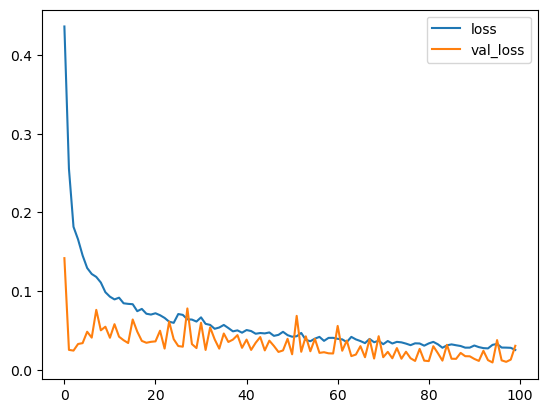

In [27]:
results(df, 30, 1, Scale, 'NSEBANK')

Epoch 1/100
6/6 [==============================] - 5s 189ms/step - loss: 1.1939 - val_loss: 0.9735
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 0.6756 - val_loss: 1.1921
Epoch 3/100
6/6 [==============================] - 0s 28ms/step - loss: 0.3442 - val_loss: 1.2957
Epoch 4/100
6/6 [==============================] - 0s 30ms/step - loss: 0.2374 - val_loss: 1.3225
Epoch 5/100
6/6 [==============================] - 0s 26ms/step - loss: 0.2377 - val_loss: 1.3166
Epoch 6/100
6/6 [==============================] - 0s 28ms/step - loss: 0.2058 - val_loss: 1.2909
Epoch 7/100
6/6 [==============================] - 0s 30ms/step - loss: 0.2152 - val_loss: 1.2638
Epoch 8/100
6/6 [==============================] - 0s 30ms/step - loss: 0.1740 - val_loss: 1.2362
Epoch 9/100
6/6 [==============================] - 0s 31ms/step - loss: 0.1761 - val_loss: 1.1878
Epoch 10/100
6/6 [==============================] - 0s 32ms/step - loss: 0.1588 - val_loss: 1.1573
Epoch 11/100
6/6 [

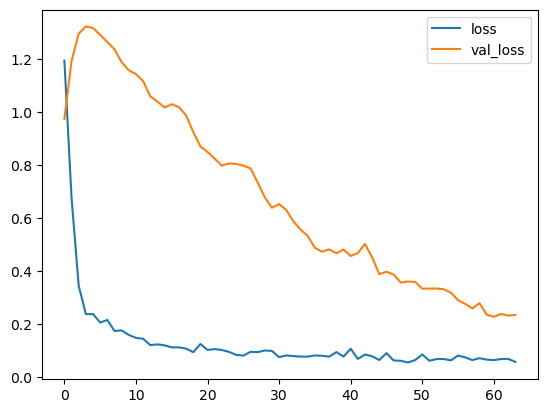

In [25]:
results1(df, 30, 1, Scale, 'NSEBANK')

Epoch 1/100
6/6 [==============================] - 4s 225ms/step - loss: 1.1009 - val_loss: 1.2553
Epoch 2/100
6/6 [==============================] - 0s 33ms/step - loss: 0.7938 - val_loss: 1.2715
Epoch 3/100
6/6 [==============================] - 0s 32ms/step - loss: 0.5908 - val_loss: 1.3565
Epoch 4/100
6/6 [==============================] - 0s 37ms/step - loss: 0.4030 - val_loss: 1.4888
Epoch 5/100
6/6 [==============================] - 0s 32ms/step - loss: 0.3487 - val_loss: 1.5243
Epoch 6/100
6/6 [==============================] - 0s 34ms/step - loss: 0.2940 - val_loss: 1.4586
Epoch 7/100
6/6 [==============================] - 0s 37ms/step - loss: 0.2643 - val_loss: 1.4528
Epoch 8/100
6/6 [==============================] - 0s 35ms/step - loss: 0.2316 - val_loss: 1.3662
Epoch 9/100
6/6 [==============================] - 0s 31ms/step - loss: 0.2317 - val_loss: 1.3197
Epoch 10/100
6/6 [==============================] - 0s 32ms/step - loss: 0.1615 - val_loss: 1.2807
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0368 - val_loss: 0.1641
Epoch 85/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0438 - val_loss: 0.1584
Epoch 86/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0407 - val_loss: 0.1770
Epoch 87/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0444 - val_loss: 0.1889
Epoch 88/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0379 - val_loss: 0.1675
Epoch 89/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0400 - val_loss: 0.1740
Epoch 90/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0465 - val_loss: 0.1765
Epoch 91/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0377 - val_loss: 0.1566
Epoch 92/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0441 - val_loss: 0.1543
Epoch 93/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0374 - val_loss: 0.1583
Epoch 94/1

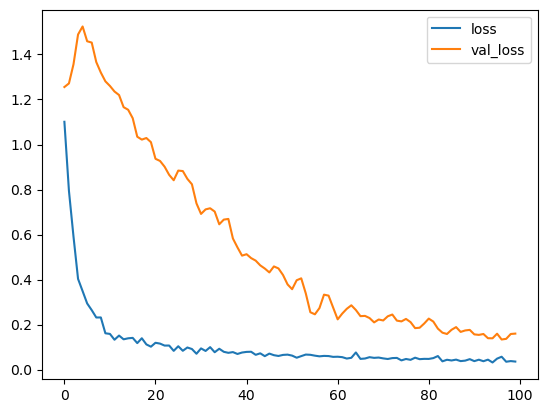

Epoch 1/100
6/6 [==============================] - 4s 150ms/step - loss: 0.7098 - val_loss: 0.7685
Epoch 2/100
6/6 [==============================] - 0s 27ms/step - loss: 0.4970 - val_loss: 0.7053
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 0.3263 - val_loss: 0.6911
Epoch 4/100
6/6 [==============================] - 0s 27ms/step - loss: 0.2156 - val_loss: 0.7064
Epoch 5/100
6/6 [==============================] - 0s 27ms/step - loss: 0.2149 - val_loss: 0.7151
Epoch 6/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1948 - val_loss: 0.7085
Epoch 7/100
6/6 [==============================] - 0s 29ms/step - loss: 0.1860 - val_loss: 0.7002
Epoch 8/100
6/6 [==============================] - 0s 32ms/step - loss: 0.1553 - val_loss: 0.6984
Epoch 9/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1772 - val_loss: 0.6838
Epoch 10/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1362 - val_loss: 0.6775
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0564 - val_loss: 0.0428
Epoch 85/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0403 - val_loss: 0.0494
Epoch 86/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0602 - val_loss: 0.0438
Epoch 87/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0445 - val_loss: 0.0460
Epoch 88/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0586 - val_loss: 0.0613
Epoch 89/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0520 - val_loss: 0.0480
Epoch 90/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0552 - val_loss: 0.0538
Epoch 91/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0489 - val_loss: 0.0463
Epoch 92/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0503 - val_loss: 0.0518
Epoch 93/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0387 - val_loss: 0.0458
Epoch 94/1

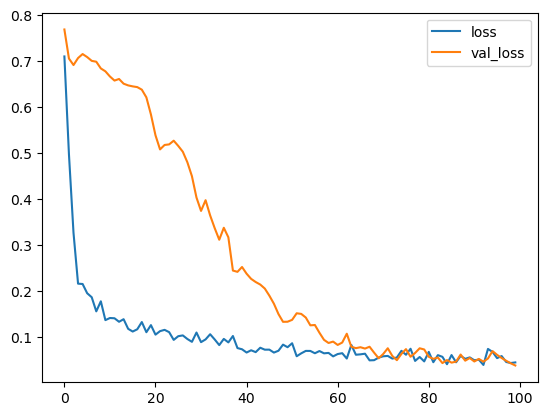

Epoch 1/100
6/6 [==============================] - 4s 181ms/step - loss: 0.4392 - val_loss: 3.0641
Epoch 2/100
6/6 [==============================] - 0s 30ms/step - loss: 0.2735 - val_loss: 3.0644
Epoch 3/100
6/6 [==============================] - 0s 33ms/step - loss: 0.2417 - val_loss: 3.0898
Epoch 4/100
6/6 [==============================] - 0s 36ms/step - loss: 0.2003 - val_loss: 3.0795
Epoch 5/100
6/6 [==============================] - 0s 34ms/step - loss: 0.1770 - val_loss: 3.0134
Epoch 6/100
6/6 [==============================] - 0s 34ms/step - loss: 0.1745 - val_loss: 2.9824
Epoch 7/100
6/6 [==============================] - 0s 43ms/step - loss: 0.1577 - val_loss: 2.9306
Epoch 8/100
6/6 [==============================] - 0s 36ms/step - loss: 0.1485 - val_loss: 2.8931
Epoch 9/100
6/6 [==============================] - 0s 34ms/step - loss: 0.1213 - val_loss: 2.8659
Epoch 10/100
6/6 [==============================] - 0s 33ms/step - loss: 0.1256 - val_loss: 2.8482
Epoch 11/100
6/6 [

1/1 [==============================] - 1s 1s/step
        Date        Open
0 2023-11-30  183.419144
1 2023-12-01  183.442291
2 2023-12-02  183.345184
3 2023-12-03  183.409103
4 2023-12-04  183.409286


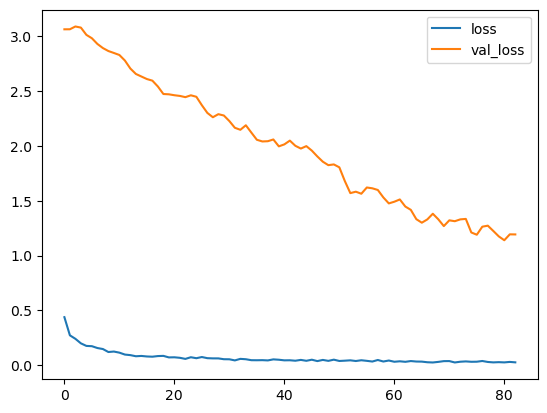

Epoch 1/100
6/6 [==============================] - 6s 161ms/step - loss: 0.3395 - val_loss: 2.7391
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 0.2203 - val_loss: 2.5797
Epoch 3/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1668 - val_loss: 2.5245
Epoch 4/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1491 - val_loss: 2.5198
Epoch 5/100
6/6 [==============================] - 0s 31ms/step - loss: 0.1307 - val_loss: 2.5452
Epoch 6/100
6/6 [==============================] - 0s 35ms/step - loss: 0.1188 - val_loss: 2.4998
Epoch 7/100
6/6 [==============================] - 0s 36ms/step - loss: 0.1205 - val_loss: 2.4892
Epoch 8/100
6/6 [==============================] - 0s 37ms/step - loss: 0.1179 - val_loss: 2.4979
Epoch 9/100
6/6 [==============================] - 0s 35ms/step - loss: 0.1218 - val_loss: 2.4159
Epoch 10/100
6/6 [==============================] - 0s 39ms/step - loss: 0.0994 - val_loss: 2.3165
Epoch 11/100
6/6 [

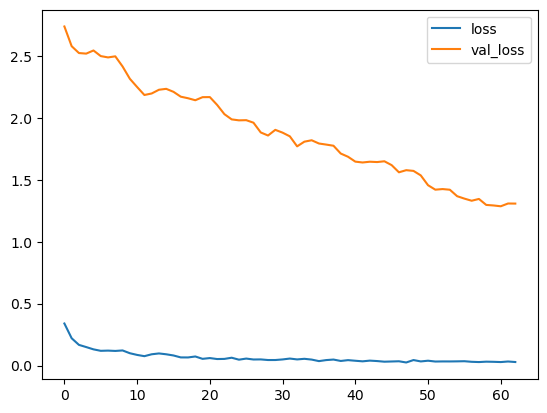

Epoch 1/100
6/6 [==============================] - 4s 157ms/step - loss: 2.1107 - val_loss: 0.7174
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 0.8619 - val_loss: 0.6040
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 0.6137 - val_loss: 0.5329
Epoch 4/100
6/6 [==============================] - 0s 27ms/step - loss: 0.3964 - val_loss: 0.4909
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.4214 - val_loss: 0.4742
Epoch 6/100
6/6 [==============================] - 0s 29ms/step - loss: 0.3300 - val_loss: 0.4862
Epoch 7/100
6/6 [==============================] - 0s 29ms/step - loss: 0.3293 - val_loss: 0.4997
Epoch 8/100
6/6 [==============================] - 0s 27ms/step - loss: 0.3452 - val_loss: 0.5028
Epoch 9/100
6/6 [==============================] - 0s 29ms/step - loss: 0.3105 - val_loss: 0.4882
Epoch 10/100
6/6 [==============================] - 0s 28ms/step - loss: 0.2836 - val_loss: 0.4830
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 27ms/step - loss: 0.1214 - val_loss: 0.1045
Epoch 85/100
6/6 [==============================] - 0s 30ms/step - loss: 0.1433 - val_loss: 0.1045
Epoch 86/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1323 - val_loss: 0.1025
Epoch 87/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1344 - val_loss: 0.1037
Epoch 88/100
6/6 [==============================] - 0s 29ms/step - loss: 0.1368 - val_loss: 0.1018
Epoch 89/100
6/6 [==============================] - 0s 27ms/step - loss: 0.1385 - val_loss: 0.1028
Epoch 90/100
6/6 [==============================] - 0s 29ms/step - loss: 0.1222 - val_loss: 0.1044
Epoch 91/100
6/6 [==============================] - 0s 31ms/step - loss: 0.1379 - val_loss: 0.1016
Epoch 92/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1161 - val_loss: 0.1006
Epoch 93/100
6/6 [==============================] - 0s 29ms/step - loss: 0.1122 - val_loss: 0.1047
Epoch 94/1

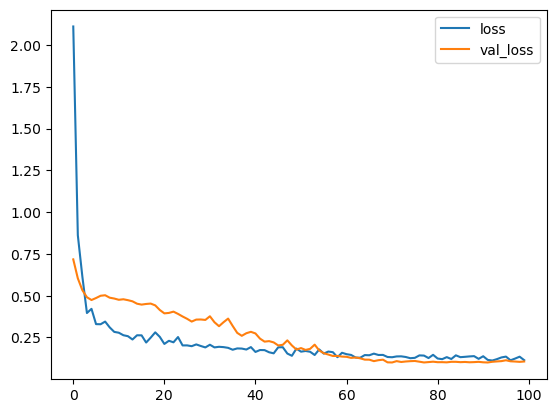

Epoch 1/100
6/6 [==============================] - 4s 163ms/step - loss: 1.4574 - val_loss: 2.6829
Epoch 2/100
6/6 [==============================] - 0s 34ms/step - loss: 0.6605 - val_loss: 2.5403
Epoch 3/100
6/6 [==============================] - 0s 34ms/step - loss: 0.4155 - val_loss: 2.4194
Epoch 4/100
6/6 [==============================] - 0s 38ms/step - loss: 0.3332 - val_loss: 2.3175
Epoch 5/100
6/6 [==============================] - 0s 33ms/step - loss: 0.2656 - val_loss: 2.2035
Epoch 6/100
6/6 [==============================] - 0s 33ms/step - loss: 0.2090 - val_loss: 2.0762
Epoch 7/100
6/6 [==============================] - 0s 39ms/step - loss: 0.1741 - val_loss: 1.9716
Epoch 8/100
6/6 [==============================] - 0s 34ms/step - loss: 0.1640 - val_loss: 1.8871
Epoch 9/100
6/6 [==============================] - 0s 34ms/step - loss: 0.1452 - val_loss: 1.8193
Epoch 10/100
6/6 [==============================] - 0s 35ms/step - loss: 0.1413 - val_loss: 1.7715
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0433 - val_loss: 0.2135
Epoch 85/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0384 - val_loss: 0.2012
Epoch 86/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0386 - val_loss: 0.2051
Epoch 87/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0401 - val_loss: 0.1955
Epoch 88/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0351 - val_loss: 0.1837
Epoch 89/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0412 - val_loss: 0.1853
Epoch 90/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0390 - val_loss: 0.1980
Epoch 91/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0437 - val_loss: 0.2019
Epoch 92/100
6/6 [==============================] - 0s 35ms/step - loss: 0.0391 - val_loss: 0.2033
Epoch 93/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0430 - val_loss: 0.2160
Epoch 94/1

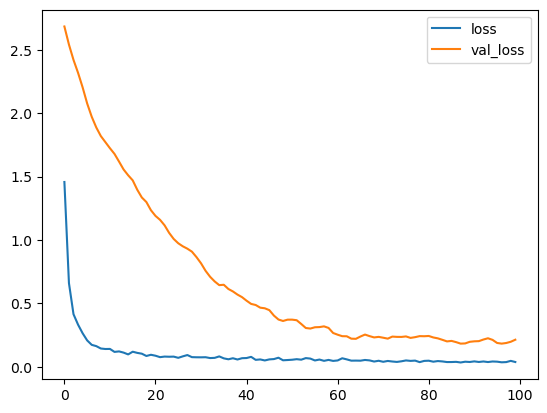

Epoch 1/100
6/6 [==============================] - 5s 160ms/step - loss: 0.3866 - val_loss: 3.1447
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 0.2155 - val_loss: 3.0742
Epoch 3/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1544 - val_loss: 3.1385
Epoch 4/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1367 - val_loss: 3.1432
Epoch 5/100
6/6 [==============================] - 0s 29ms/step - loss: 0.1279 - val_loss: 3.0687
Epoch 6/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1055 - val_loss: 3.0551
Epoch 7/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1214 - val_loss: 3.0536
Epoch 8/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0998 - val_loss: 3.0105
Epoch 9/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0842 - val_loss: 2.9644
Epoch 10/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0943 - val_loss: 2.9429
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0251 - val_loss: 0.5306
Epoch 85/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0250 - val_loss: 0.5164
Epoch 86/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0279 - val_loss: 0.5532
Epoch 87/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0249 - val_loss: 0.5006
Epoch 88/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0282 - val_loss: 0.4901
Epoch 89/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0277 - val_loss: 0.4793
Epoch 90/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0280 - val_loss: 0.5137
Epoch 91/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0262 - val_loss: 0.5339
Epoch 92/100
6/6 [==============================] - 0s 35ms/step - loss: 0.0225 - val_loss: 0.5234
Epoch 93/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0261 - val_loss: 0.5789
Epoch 94/1

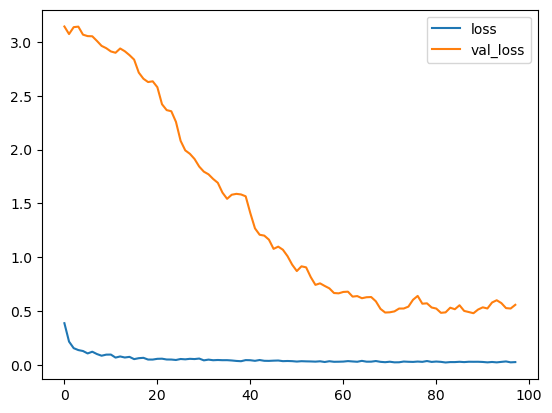

Epoch 1/100
6/6 [==============================] - 4s 200ms/step - loss: 3.4831 - val_loss: 1.7832
Epoch 2/100
6/6 [==============================] - 0s 29ms/step - loss: 2.2377 - val_loss: 1.6036
Epoch 3/100
6/6 [==============================] - 0s 30ms/step - loss: 1.6342 - val_loss: 1.5102
Epoch 4/100
6/6 [==============================] - 0s 34ms/step - loss: 1.3370 - val_loss: 1.4542
Epoch 5/100
6/6 [==============================] - 0s 31ms/step - loss: 1.0748 - val_loss: 1.4147
Epoch 6/100
6/6 [==============================] - 0s 31ms/step - loss: 0.8970 - val_loss: 1.3830
Epoch 7/100
6/6 [==============================] - 0s 37ms/step - loss: 0.7684 - val_loss: 1.3574
Epoch 8/100
6/6 [==============================] - 0s 33ms/step - loss: 0.6554 - val_loss: 1.3347
Epoch 9/100
6/6 [==============================] - 0s 37ms/step - loss: 0.5651 - val_loss: 1.3087
Epoch 10/100
6/6 [==============================] - 0s 34ms/step - loss: 0.4834 - val_loss: 1.2868
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0605 - val_loss: 0.1106
Epoch 85/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0678 - val_loss: 0.1114
Epoch 86/100
6/6 [==============================] - 0s 39ms/step - loss: 0.0465 - val_loss: 0.1122
Epoch 87/100
6/6 [==============================] - 0s 38ms/step - loss: 0.0603 - val_loss: 0.1124
Epoch 88/100
6/6 [==============================] - 0s 40ms/step - loss: 0.0753 - val_loss: 0.1099
Epoch 89/100
6/6 [==============================] - 0s 39ms/step - loss: 0.0513 - val_loss: 0.1056
Epoch 90/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0618 - val_loss: 0.1015
Epoch 91/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0533 - val_loss: 0.0990
Epoch 92/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0494 - val_loss: 0.0969
Epoch 93/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0547 - val_loss: 0.0950
Epoch 94/1

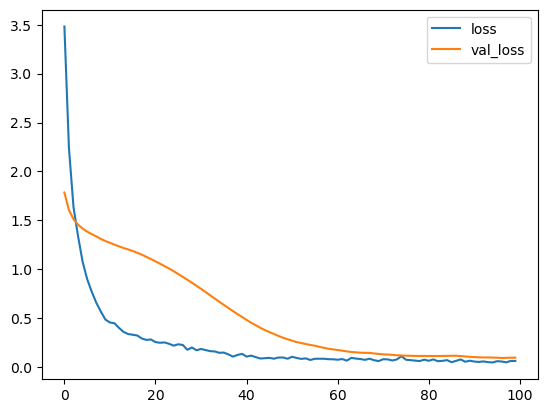

Epoch 1/100
6/6 [==============================] - 4s 154ms/step - loss: 0.7300 - val_loss: 0.5652
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 0.4939 - val_loss: 0.5982
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 0.3915 - val_loss: 0.6001
Epoch 4/100
6/6 [==============================] - 0s 26ms/step - loss: 0.3407 - val_loss: 0.5875
Epoch 5/100
6/6 [==============================] - 0s 26ms/step - loss: 0.2573 - val_loss: 0.5898
Epoch 6/100
6/6 [==============================] - 0s 27ms/step - loss: 0.2749 - val_loss: 0.5755
Epoch 7/100
6/6 [==============================] - 0s 27ms/step - loss: 0.2299 - val_loss: 0.5647
Epoch 8/100
6/6 [==============================] - 0s 27ms/step - loss: 0.2224 - val_loss: 0.5481
Epoch 9/100
6/6 [==============================] - 0s 31ms/step - loss: 0.2005 - val_loss: 0.5478
Epoch 10/100
6/6 [==============================] - 0s 26ms/step - loss: 0.2071 - val_loss: 0.5396
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0868 - val_loss: 0.0676
Epoch 85/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0794 - val_loss: 0.0636
Epoch 86/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0735 - val_loss: 0.0668
Epoch 87/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0795 - val_loss: 0.0730
Epoch 88/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0713 - val_loss: 0.0684
Epoch 89/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0889 - val_loss: 0.0581
Epoch 90/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0676 - val_loss: 0.0623
Epoch 91/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0934 - val_loss: 0.0692
Epoch 92/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0896 - val_loss: 0.0659
Epoch 93/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0682 - val_loss: 0.0462
Epoch 94/1

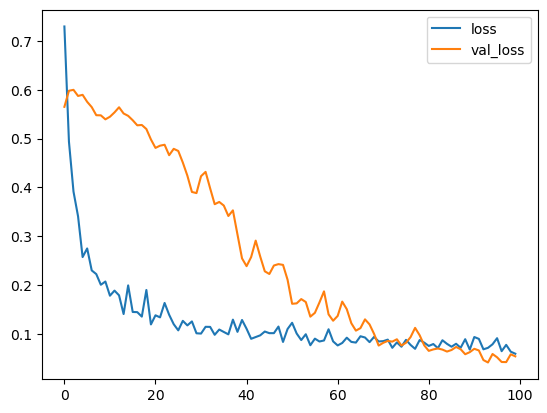

Epoch 1/100
6/6 [==============================] - 5s 153ms/step - loss: 1.6846 - val_loss: 0.8500
Epoch 2/100
6/6 [==============================] - 0s 24ms/step - loss: 1.0189 - val_loss: 0.7529
Epoch 3/100
6/6 [==============================] - 0s 25ms/step - loss: 0.6967 - val_loss: 0.6764
Epoch 4/100
6/6 [==============================] - 0s 30ms/step - loss: 0.5138 - val_loss: 0.6222
Epoch 5/100
6/6 [==============================] - 0s 34ms/step - loss: 0.4581 - val_loss: 0.6082
Epoch 6/100
6/6 [==============================] - 0s 39ms/step - loss: 0.3331 - val_loss: 0.6226
Epoch 7/100
6/6 [==============================] - 0s 34ms/step - loss: 0.3534 - val_loss: 0.6408
Epoch 8/100
6/6 [==============================] - 0s 37ms/step - loss: 0.3676 - val_loss: 0.6365
Epoch 9/100
6/6 [==============================] - 0s 38ms/step - loss: 0.3048 - val_loss: 0.6243
Epoch 10/100
6/6 [==============================] - 0s 39ms/step - loss: 0.2185 - val_loss: 0.6067
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 27ms/step - loss: 0.1027 - val_loss: 0.0576
Epoch 85/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0961 - val_loss: 0.0514
Epoch 86/100
6/6 [==============================] - 0s 26ms/step - loss: 0.1251 - val_loss: 0.0571
Epoch 87/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0911 - val_loss: 0.0663
Epoch 88/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0883 - val_loss: 0.0667
Epoch 89/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0915 - val_loss: 0.0625
Epoch 90/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0945 - val_loss: 0.0598
Epoch 91/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0923 - val_loss: 0.0613
Epoch 92/100
6/6 [==============================] - 0s 31ms/step - loss: 0.1105 - val_loss: 0.0615
Epoch 93/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0847 - val_loss: 0.0629
Epoch 94/1

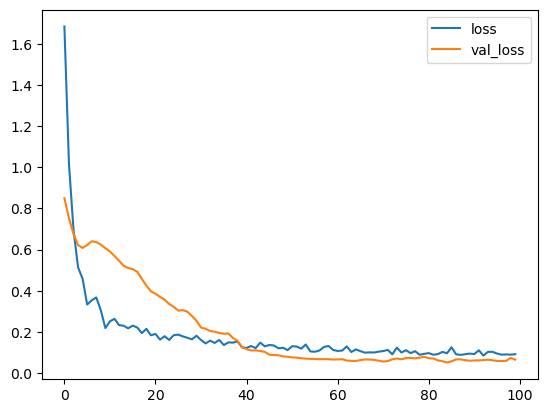

Epoch 1/100
6/6 [==============================] - 4s 146ms/step - loss: 0.8471 - val_loss: 1.3360
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 0.3818 - val_loss: 1.3155
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 0.2786 - val_loss: 1.2956
Epoch 4/100
6/6 [==============================] - 0s 27ms/step - loss: 0.2415 - val_loss: 1.2550
Epoch 5/100
6/6 [==============================] - 0s 27ms/step - loss: 0.1899 - val_loss: 1.2012
Epoch 6/100
6/6 [==============================] - 0s 27ms/step - loss: 0.1968 - val_loss: 1.1403
Epoch 7/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1837 - val_loss: 1.0915
Epoch 8/100
6/6 [==============================] - 0s 29ms/step - loss: 0.1569 - val_loss: 1.0735
Epoch 9/100
6/6 [==============================] - 0s 31ms/step - loss: 0.1457 - val_loss: 1.0667
Epoch 10/100
6/6 [==============================] - 0s 29ms/step - loss: 0.1502 - val_loss: 1.0733
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0402 - val_loss: 0.2163
Epoch 85/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0344 - val_loss: 0.2197
Epoch 86/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0359 - val_loss: 0.2161
Epoch 87/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0454 - val_loss: 0.2132
Epoch 88/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0425 - val_loss: 0.2154
Epoch 89/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0375 - val_loss: 0.2057
Epoch 90/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0352 - val_loss: 0.1980
Epoch 91/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0384 - val_loss: 0.1930
Epoch 92/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0334 - val_loss: 0.1827
Epoch 93/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0371 - val_loss: 0.1755
Epoch 94/1

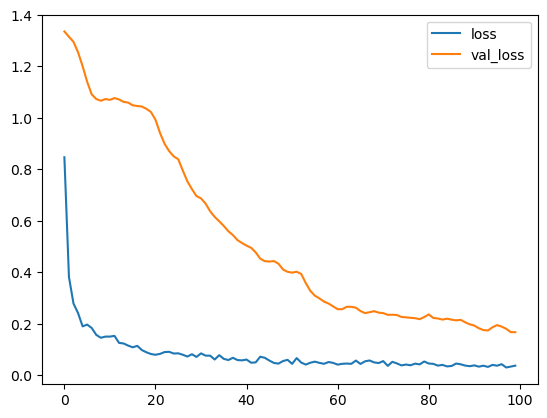

Epoch 1/100
6/6 [==============================] - 5s 177ms/step - loss: 1.0031 - val_loss: 1.3717
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 0.6097 - val_loss: 1.3137
Epoch 3/100
6/6 [==============================] - 0s 32ms/step - loss: 0.4269 - val_loss: 1.2586
Epoch 4/100
6/6 [==============================] - 0s 28ms/step - loss: 0.3104 - val_loss: 1.1906
Epoch 5/100
6/6 [==============================] - 0s 26ms/step - loss: 0.2767 - val_loss: 1.1042
Epoch 6/100
6/6 [==============================] - 0s 28ms/step - loss: 0.2428 - val_loss: 1.0517
Epoch 7/100
6/6 [==============================] - 0s 30ms/step - loss: 0.2447 - val_loss: 1.0417
Epoch 8/100
6/6 [==============================] - 0s 26ms/step - loss: 0.1900 - val_loss: 1.0511
Epoch 9/100
6/6 [==============================] - 0s 25ms/step - loss: 0.1905 - val_loss: 1.0620
Epoch 10/100
6/6 [==============================] - 0s 25ms/step - loss: 0.2159 - val_loss: 1.0692
Epoch 11/100
6/6 [

Epoch 84/100
6/6 [==============================] - 0s 30ms/step - loss: 0.0838 - val_loss: 0.1261
Epoch 85/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0768 - val_loss: 0.1241
Epoch 86/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0707 - val_loss: 0.1283
Epoch 87/100
6/6 [==============================] - 0s 32ms/step - loss: 0.0728 - val_loss: 0.1323
Epoch 88/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0842 - val_loss: 0.1305
Epoch 89/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0674 - val_loss: 0.1324
Epoch 90/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0683 - val_loss: 0.1319
Epoch 91/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0672 - val_loss: 0.1289
Epoch 92/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0832 - val_loss: 0.1290
Epoch 93/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0591 - val_loss: 0.1352
Epoch 94/1

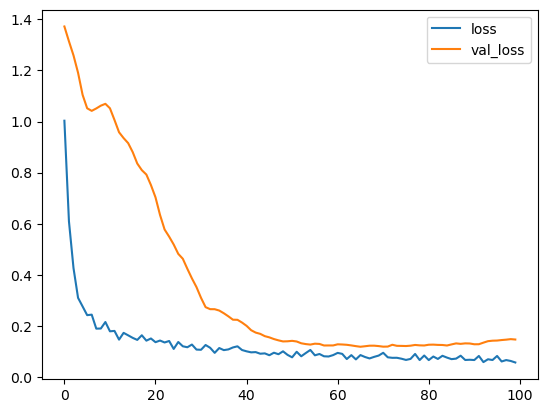

In [26]:
d={'AXIS':df_axis, 'SBI':df_sbi, 'RBL': df_rbl ,'PNB': df_pnb ,'KOTAK': df_kot, 
   'INDUSIND':df_ind, 'IDFC': df_idfc, 'ICIC': df_icic , 'BANDHAN': df_band, 'HDB': df_hdfc, 'FEDERAL': df_fed,
   'AU FIN':df_au}

for x in d.keys():
    results1(d[x], 30, 1, Scale, x)